In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [3]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))


**Train vanilla autoencoder with encoding size 100**

In [6]:
input_size = 784
hidden_size = 100
output_size = 784

In [7]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

In [8]:
epochs = 5
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 75us/step - loss: 0.0382 - val_loss: 0.0171
Epoch 2/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.0129 - val_loss: 0.0092
Epoch 3/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.0076 - val_loss: 0.0059
Epoch 4/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.0053 - val_loss: 0.0045
Epoch 5/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.0042 - val_loss: 0.0037


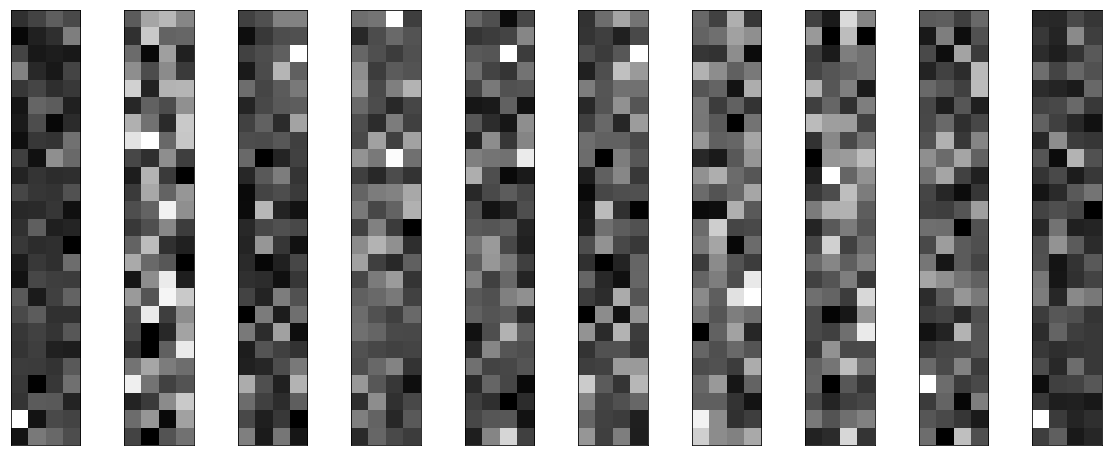

In [10]:
conv_encoder = Model(x, h)
encoded_imgs = conv_encoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 25).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [11]:
decoded_imgs = autoencoder.predict(X_test)


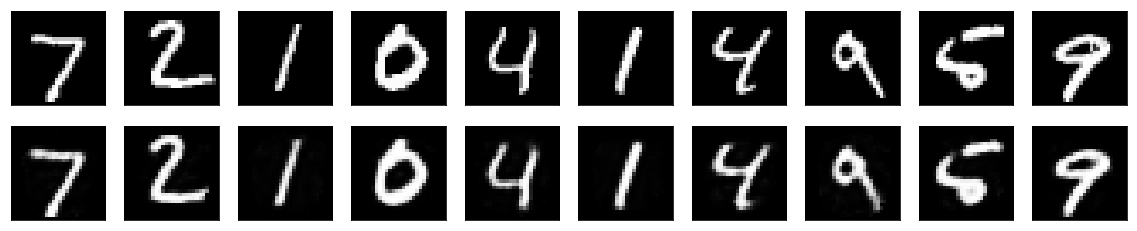

In [12]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()


dict_keys(['val_loss', 'loss'])


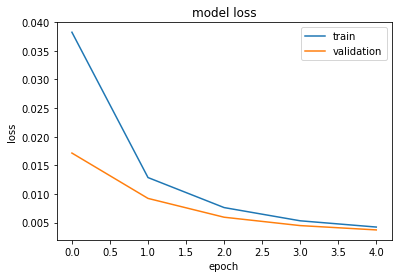

In [13]:

print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

**Train autoencoder with several different encoding sizes; compare performances**

In [39]:
input_size = 784
hidden_size_list = [3, 4, 5, 10, 15, 20, 25, 30, 40, 50, 60]
output_size = 784
losses = []

for hidden_size in hidden_size_list:
    
    x = Input(shape=(input_size,))
    h = Dense(hidden_size, activation='relu')(x)
    r = Dense(output_size, activation='sigmoid')(h)

    autoencoder = Model(inputs=x, outputs=r)
    autoencoder.compile(optimizer='adam', loss='mse')
    
    epochs = 5
    batch_size = 128

    history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))
    
    conv_encoder = Model(x, h)
    encoded_imgs = conv_encoder.predict(X_test)

    decoded_imgs = autoencoder.predict(X_test)

    losses.append((history.history['loss'][-1], history.history['val_loss'][-1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.0856 - val_loss: 0.0627
Epoch 2/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.0590 - val_loss: 0.0569
Epoch 3/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.0564 - val_loss: 0.0553
Epoch 4/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.0550 - val_loss: 0.0542
Epoch 5/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.0541 - val_loss: 0.0535
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.0831 - val_loss: 0.0610
Epoch 2/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.0556 - val_loss: 0.0520
Epoch 3/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.0513 - val_loss: 0.0502
Epoch 4/5
60000/60000 [==============================] - 3s 48us/ste

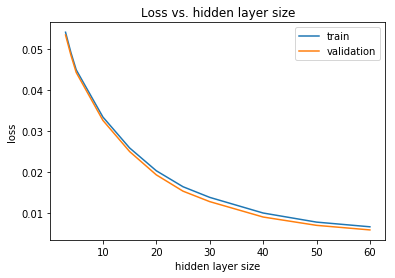

In [40]:
plt.plot(hidden_size_list, losses)
plt.title('Loss vs. hidden layer size')
plt.ylabel('loss')
plt.xlabel('hidden layer size')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

**Implement simple neural network on MNIST, using embeddings learned from autoencoder**

In [14]:
conv_encoder = Model(x, h)
encoded_imgs = conv_encoder.predict(X_train)
len(encoded_imgs)

60000

In [24]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint

# Preparing the dataset
# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Making a copy before flattening for the next code-segment which displays images
x_train_drawing = x_train

image_size = 784 # 28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)

# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [25]:
x_test = encoded_imgs[500:]
x_train = encoded_imgs[:500]

In [360]:
x_test = x_train[500:]
x_train = x_train[:500]

In [26]:
y_test = y_train[500:]
y_train = y_train[:500]

In [27]:
model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=32, activation='sigmoid'))
model.add(Dense(units=num_classes, activation='softmax'))
#model.summary()

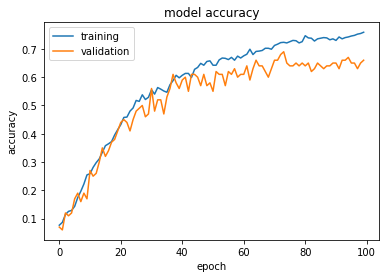

Test loss: 1.38
Test accuracy: 0.676


In [28]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=False, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Text(0,0.5,'Accuracy difference: embedding - full image input')

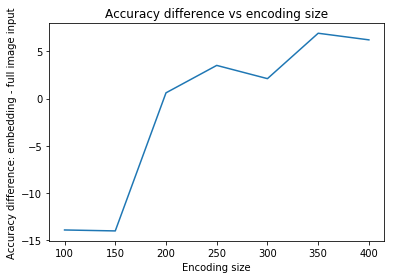

In [41]:
acc_diff=[-13.9, -14, 0.6,3.5, 2.1, 6.9, 6.2]
enc_size=[100,150,200,250,300,350,400]
plt.plot(enc_size,acc_diff)
plt.title('Accuracy difference vs encoding size')
plt.xlabel('Encoding size')
plt.ylabel('Accuracy difference: embedding - full image input')

**Perform PCA dimensionality reduction on the entire dataset and feed as input to the classifier**

In [38]:
# Preparing the dataset
# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Making a copy before flattening for the next code-segment which displays images
x_train_drawing = x_train

image_size = 784 # 28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)

# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [31]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [32]:
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [33]:
x_train = pca.transform(x_train)


In [34]:
x_test = x_train[500:]
x_train = x_train[:500]

In [35]:
y_test = y_train[500:]
y_train = y_train[:500]

In [36]:
model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=32, activation='sigmoid'))
model.add(Dense(units=num_classes, activation='softmax'))
#model.summary()

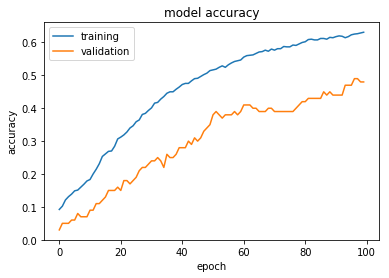

Test loss: 1.61
Test accuracy: 0.509


In [37]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=False, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')